In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [12]:
# Load the dataset
car_dataset = pd.read_csv(r'C:\Users\qq\Desktop\CERTIFICATIONS\Python\Data Analysis Projects\Car Price Prediction\archive\car data.csv')

In [13]:
#inspecting the first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
#Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [15]:
#Getting some information about the data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
# Checking for missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [18]:
#Encoding "Fuel Type", "Seller Type" and "Transmission" columns
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

C:\Users\qq\AppData\Local\Temp\ipykernel_25908\2225447269.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\qq\AppData\Local\Temp\ipykernel_25908\2225447269.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1}}, inplace=True)
C:\Users\qq\AppData\Local\Temp\ipykernel_25908\2225447269.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [19]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0


Splitting the Data and Target

In [20]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [21]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,1,0,0
1,2013,9.54,43000,1,1,0,0
2,2017,9.85,6900,0,1,0,0
3,2011,4.15,5200,0,1,0,0
4,2014,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,1,0,0
297,2015,5.90,60000,0,1,0,0
298,2009,11.00,87934,0,1,0,0
299,2017,12.50,9000,1,1,0,0


In [22]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting Training and Testing Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training

1. Linear Regression

In [25]:
#Loading the model
lin_reg_model = LinearRegression()

#Training the model
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [26]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [28]:
#R2 Score
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R2 Error Score: ", error_score)

R2 Error Score:  0.8799451660493699


Visualise the actual price and predicted prices

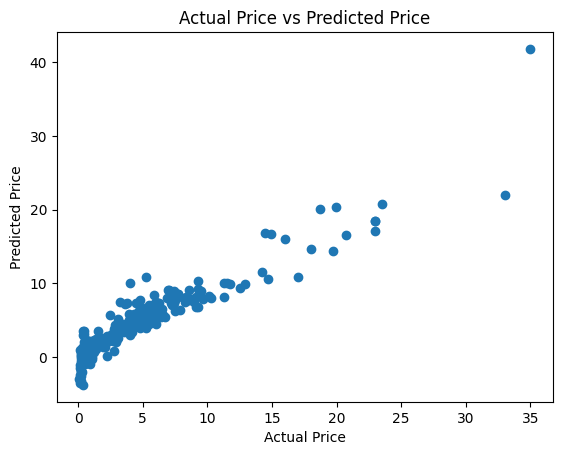

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [30]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [32]:
#R2 Score
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Error Score(test): ", test_error_score)

R2 Error Score(test):  0.8365766715026473


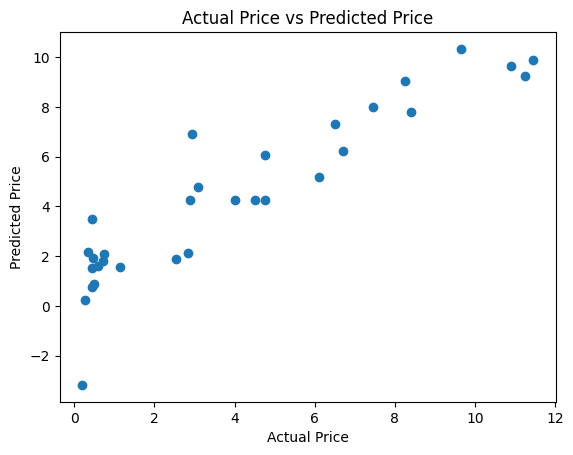

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2.Lasso Regression

In [34]:
#Loading the model
lass_reg_model = Lasso()

#Training the model
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [35]:
#Prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [36]:
#R2 Score
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R2 Error Score: ", error_score)

R2 Error Score:  0.8427856123435795


Visualise the actual price and predicted prices

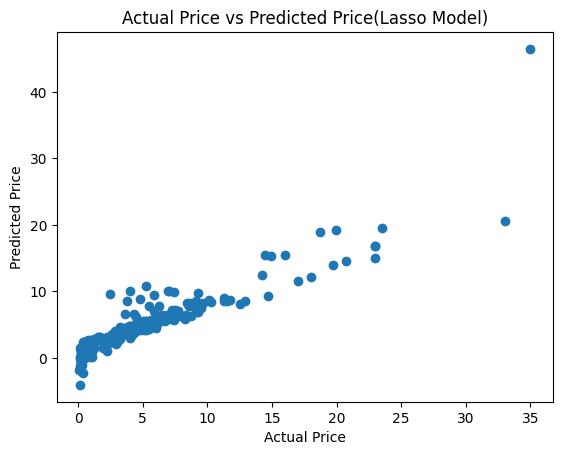

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price(Lasso Model)")
plt.show()

In [38]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [39]:
#R2 Score
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Error Score(test): ", test_error_score)

R2 Error Score(test):  0.8709167941173201


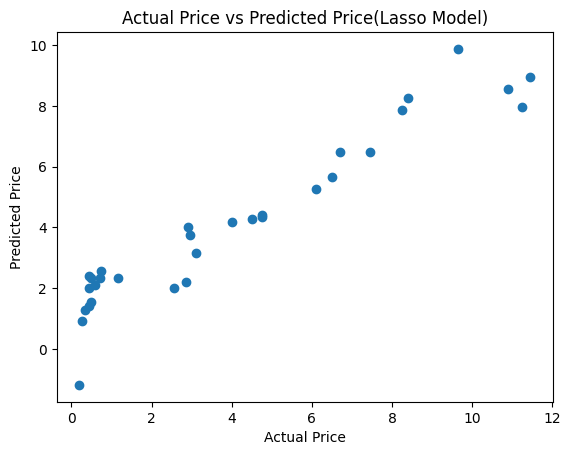

In [41]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price(Lasso Model)")
plt.show()